In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.74640
1,-0.098505,NaN,2.062800,NaN,NaN,1.17850,NaN,NaN,3.21670,NaN,0.772910,0.64145
2,-0.169460,NaN,NaN,3.06500,1.567600,NaN,0.92160,NaN,1.51870,NaN,NaN,1.87680
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.26580
4,0.098830,NaN,0.429700,NaN,NaN,2.27110,NaN,NaN,1.31400,NaN,1.026900,2.18840
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,NaN,NaN,0.55612,0.070769,2.07470,NaN,NaN,3.49330,1.32550,NaN,NaN
796,3.466600,NaN,NaN,1.34610,1.377300,2.28870,NaN,NaN,2.46350,1.66750,NaN,NaN
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.58530
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.14370


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	133
float64		column 2	237
float64		column 3	133
float64		column 4	159
float64		column 5	107
float64		column 6	156
float64		column 7	185
float64		column 8	208
float64		column 9	130
float64		column 10	156
float64		column 11	182
float64		column 12	104


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,667.000000,563.000000,667.000000,641.000000,693.000000,644.000000,615.000000,592.000000,670.000000,644.000000,618.000000,696.000000
mean,1.463538,1.403768,1.992088,1.923789,1.975231,2.028912,1.957560,2.003052,2.001953,1.995801,1.961197,1.966120
std,2.725311,3.558280,1.154274,1.188363,1.162998,1.130373,1.140965,1.136683,1.137099,1.161091,1.182782,1.117311
min,-4.692600,-6.952900,0.020547,0.006977,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002033,0.000288
25%,-0.391380,-0.427280,1.014000,0.874000,0.976710,1.059700,1.004850,0.992005,1.071675,1.026400,0.884445,0.990685
50%,0.523590,2.209200,1.968700,1.870400,2.014100,2.013500,1.974500,2.011000,1.970300,2.012150,1.940650,1.989600
75%,3.943050,4.498250,2.950150,2.983500,2.922900,3.062400,2.947450,2.950700,3.007400,3.010050,3.001075,2.865550
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.978600,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

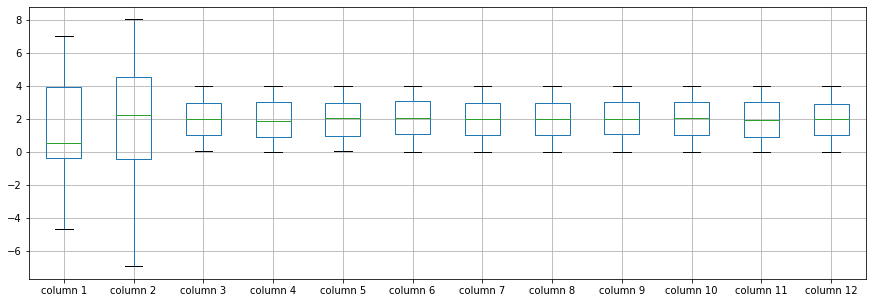

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.463538
column 2     1.403768
column 3     1.992088
column 4     1.923789
column 5     1.975231
column 6     2.028912
column 7     1.957560
column 8     2.003052
column 9     2.001953
column 10    1.995801
column 11    1.961197
column 12    1.966120
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.372368,-0.047736,-0.005295,0.028958,0.018530,-0.014186,0.024128,-0.003013,0.031022,0.021239,0.029699
column 2,-0.372368,1.000000,0.052021,-0.035222,0.037653,0.049074,0.088731,-0.017854,0.004393,-0.046497,-0.078534,0.022476
column 3,-0.047736,0.052021,1.000000,-0.015647,0.075823,0.014213,0.020922,-0.020237,0.012700,0.004133,-0.009770,0.008951
column 4,-0.005295,-0.035222,-0.015647,1.000000,0.002421,-0.038412,0.069775,0.061713,-0.017600,0.038065,0.006921,-0.026576
column 5,0.028958,0.037653,0.075823,0.002421,1.000000,0.071465,0.054283,0.039441,-0.028300,0.004888,-0.042109,0.004709
column 6,0.018530,0.049074,0.014213,-0.038412,0.071465,1.000000,-0.024106,0.023132,0.014610,-0.041777,-0.018494,-0.018607
column 7,-0.014186,0.088731,0.020922,0.069775,0.054283,-0.024106,1.000000,-0.039020,-0.014070,-0.041403,0.011787,-0.028782
column 8,0.024128,-0.017854,-0.020237,0.061713,0.039441,0.023132,-0.039020,1.000000,-0.064001,-0.068776,0.021045,-0.062261
column 9,-0.003013,0.004393,0.012700,-0.017600,-0.028300,0.014610,-0.014070,-0.064001,1.000000,0.015717,-0.012293,0.005400
column 10,0.031022,-0.046497,0.004133,0.038065,0.004888,-0.041777,-0.041403,-0.068776,0.015717,1.000000,-0.047980,0.089794


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+15,12+15+15,12+15+15,12+15+15+15+15,12+15+15+15,12+15+15,12+15,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.58134349822998
Epoch: 1 , loss: 23.483065795898437
Epoch: 2 , loss: 23.36892906188965
Epoch: 3 , loss: 23.235417671203614
Epoch: 4 , loss: 23.060386772155763
Epoch: 5 , loss: 22.714160079956056
Epoch: 6 , loss: 21.85554016113281
Epoch: 7 , loss: 19.75216594696045
Epoch: 8 , loss: 17.82768575668335
Epoch: 9 , loss: 17.094520320892332
Epoch: 10 , loss: 16.972404289245606
Epoch: 11 , loss: 16.811313648223877
Epoch: 12 , loss: 16.56949384689331
Epoch: 13 , loss: 16.64200469970703
Epoch: 14 , loss: 16.230264377593993
Epoch: 15 , loss: 16.103225994110108
Epoch: 16 , loss: 16.253583717346192
Epoch: 17 , loss: 16.13530864715576
Epoch: 18 , loss: 16.113887195587157
Epoch: 19 , loss: 16.186448211669923
Epoch: 20 , loss: 16.038213977813722
Epoch: 21 , loss: 15.981646022796632
Epoch: 22 , loss: 15.956766967773438
Epoch: 23 , loss: 16.01667543411255
Epoch: 24 , loss: 16.019854679107667
Epoch: 25 , loss: 15.92386

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.771023,0.000000,-1.891553,0.638303,0.00000,-0.625070,-0.338889,0.0,-1.842932,0.000000,0.000000
2,0.0,0.648063,-0.472595,0.000000,0.000000,0.49965,0.000000,-0.650919,0.0,-0.545501,-0.508508,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.560530,0.000000,-0.255644,-2.150641,0.00000,1.024228,-0.753628,0.0,0.346300,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,3.283544,-0.501292,0.000000,0.000000,0.00000,0.255800,-2.154303,0.0,0.000000,-2.192899,1.074605
796,0.0,4.802257,-1.730283,0.000000,0.000000,0.00000,0.925659,-1.052768,0.0,0.000000,-1.159433,0.133787
797,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
798,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(87.43174137599138, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.352232028067656

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2     0.526970
column 3     2.339900
column 4     0.933109
column 5     1.401300
column 6     0.964568
column 7     0.951565
column 8     1.249300
column 9     0.971263
column 10    1.284300
column 11    1.879400
column 12    0.976576
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.67908,3.434400,2.792400,2.77630,1.699100,3.815600,1.746400
1,-0.098505,0.592453,2.062800,1.030047,1.063023,1.17850,1.055130,1.049911,3.21670,1.080668,0.772910,0.641450
2,-0.169460,1.149593,1.998305,3.065000,1.567600,1.98205,0.921600,1.991481,1.51870,1.986299,1.924292,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.59570,2.893300,1.537500,0.99942,3.659300,0.618250,3.265800
4,0.098830,0.794710,0.429700,1.375556,1.403459,2.27110,1.398478,1.424972,1.31400,1.409500,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,0.596844,1.074708,0.556120,0.070769,2.07470,1.058840,1.068597,3.49330,1.325500,1.038201,1.079992
796,3.466600,0.767657,1.370117,1.346100,1.377300,2.28870,1.321789,1.343332,2.46350,1.667500,1.302267,1.360487
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.53700,1.225600,0.740270,2.49540,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.42430,0.810810,3.727000,1.18790,0.951120,1.884500,1.143700


In [21]:
imputations[-1].to_excel("4-gauss_AW_20(imp).xlsx", index=False, header=False)